<a href="https://colab.research.google.com/github/YoofKhaneja/Heart_Disease_Prediction/blob/master/Codes/NN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [0]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(0)

In [3]:
url = 'https://raw.githubusercontent.com/YoofKhaneja/Heart_Disease_Prediction/master/Codes/framingham.csv'
hd = pd.read_csv(url)
hd.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
print('Total patients: ', hd.shape[0])
print('Total attributes: ', hd.shape[1] - 1)
print('Number of labels: ', 1, '(', hd.columns[15], ')')

Total patients:  4240
Total attributes:  15
Number of labels:  1 ( TenYearCHD )


In [5]:
hd.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


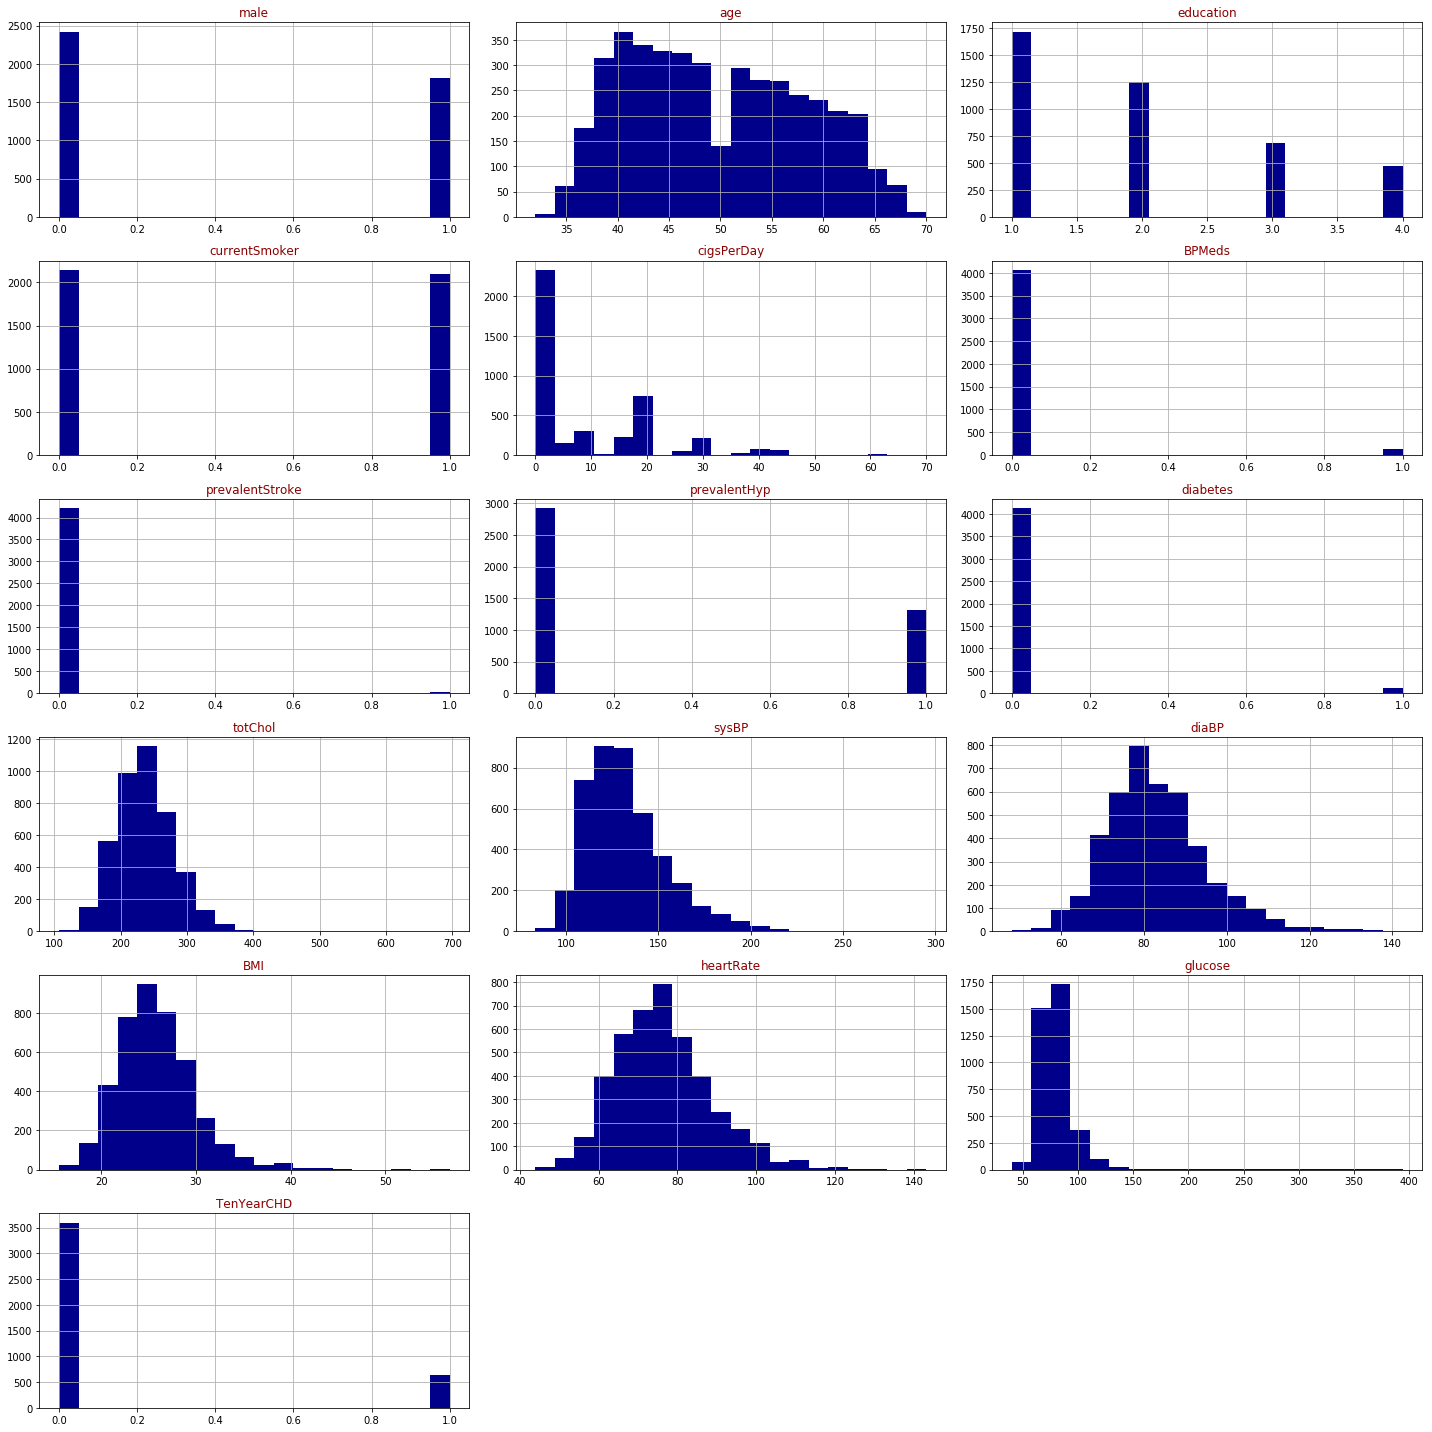

In [6]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'DarkBlue')
        ax.set_title(feature, color = 'DarkRed')
    fig.tight_layout()  
    plt.show()
draw_histograms(hd, hd.columns, 6, 3)

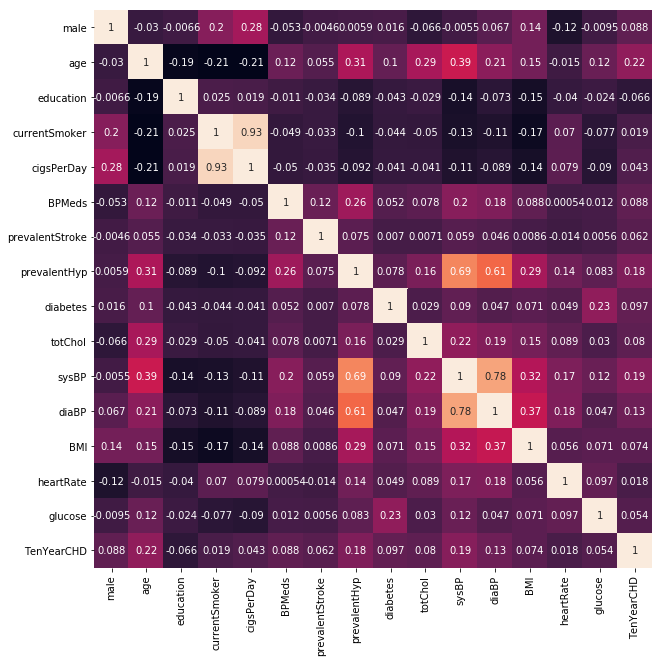

In [7]:
corr = hd.corr(method = 'spearman')
plt.figure(figsize = (10, 16))
sns.heatmap(corr, square = True, cbar = False, annot = True)

Total patients at risk of CHD:  644
Total patients not at risk of CHD:  3596


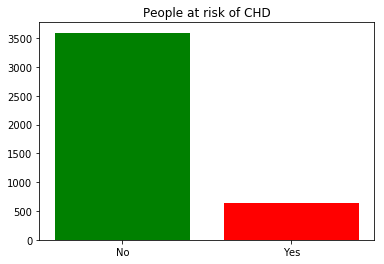

In [8]:
from collections import Counter
chdc = Counter(hd['TenYearCHD'])
print('Total patients at risk of CHD: ', chdc[1])
print('Total patients not at risk of CHD: ', chdc[0])
plt.bar(list(chdc.keys()), chdc.values(), color = ['g', 'r'])
plt.xticks(list(chdc.keys()), ['No', 'Yes'])
plt.title('People at risk of CHD')
plt.show()

In [9]:
print('Missing values: ')
print(hd.isnull().sum())
mv = np.array(hd.isnull().sum())
ta = 0
for t in mv:
    ta += t
print('\nTotal missing attributes: ', ta)
tr = 0
for i in hd.isnull().sum(axis = 1):
    if i > 0:
        tr += 1
print('\nTotal rows with missing data: ', tr)

Missing values: 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Total missing attributes:  645

Total rows with missing data:  582


In [10]:
hd.drop(['education'], axis = 1, inplace = True)
hd.dropna(axis = 0, inplace = True)
hd.shape

(3751, 15)

In [11]:
hd_ = hd.copy(deep = True)
hd_['age'] = pd.cut(hd_['age'], 
                    5, 
                    labels = [1, 2, 3, 4, 5])
hd_['cigsPerDay'] = pd.cut(hd_['cigsPerDay'], 
                           6, 
                           labels = [1, 2, 3, 4, 5, 6])
hd_['totChol'] = pd.cut(hd_['totChol'], 
                        13, 
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
hd_['sysBP'] = pd.cut(hd_['sysBP'], 
                      10, 
                      labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_['diaBP'] = pd.cut(hd_['diaBP'], 
                      8, 
                      labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_['BMI'] = pd.cut(hd_['BMI'], 
                    10, 
                    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
hd_['heartRate'] = pd.cut(hd_['heartRate'], 
                          8, 
                          labels = [1, 2, 3, 4, 5, 6, 7, 8])
hd_['glucose'] = pd.cut(hd_['glucose'], 
                        15, 
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
hd_['age'] = hd_['age'].apply(lambda x: x*0.2)
hd_['cigsPerDay'] = hd_['cigsPerDay'].apply(lambda x: round(x*0.16, 2))
hd_['totChol'] = hd_['totChol'].apply(lambda x: round(x*0.077, 2))
hd_['sysBP'] = hd_['sysBP'].apply(lambda x: round(x*0.1, 2))
hd_['diaBP'] = hd_['diaBP'].apply(lambda x: round(x*0.125, 2))
hd_['BMI'] = hd_['BMI'].apply(lambda x: round(x*0.1, 2))
hd_['heartRate'] = hd_['heartRate'].apply(lambda x: round(x*0.125, 2))
hd_['glucose'] = hd_['glucose'].apply(lambda x: round(x*0.067, 2))
hd_['BPMeds'] = hd_['BPMeds'].apply(lambda x: int(x))
hd_.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.2,0,0.16,0,0,0,0,0.15,0.2,0.25,0.3,0.38,0.13,0
1,0,0.4,0,0.16,0,0,0,0,0.31,0.2,0.38,0.4,0.62,0.13,0
2,1,0.6,1,0.32,0,0,0,0,0.23,0.3,0.38,0.3,0.38,0.13,0
3,0,0.8,1,0.48,0,0,1,0,0.23,0.4,0.50,0.4,0.25,0.20,1
4,0,0.4,1,0.32,0,0,0,0,0.31,0.3,0.50,0.2,0.50,0.13,0
5,0,0.4,0,0.16,0,0,1,0,0.23,0.5,0.75,0.4,0.38,0.20,0
6,0,1.0,0,0.16,0,0,0,0,0.23,0.3,0.25,0.5,0.25,0.13,1
7,0,0.4,1,0.32,0,0,0,0,0.39,0.1,0.25,0.2,0.38,0.13,0
8,1,0.6,0,0.16,0,0,1,0,0.31,0.3,0.50,0.3,0.38,0.13,0
9,1,0.4,1,0.48,0,0,1,0,0.23,0.4,0.62,0.2,0.50,0.20,0


In [0]:
attrib = hd_.iloc[:, :-1]
lab = hd_.iloc[:, -1]

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 1)
attrib = np.array(attrib)
lab = np.array(lab)
#print(attrib)
for train_index, test_index in sss.split(attrib, lab):
    x_train, x_test = attrib[train_index], attrib[test_index]
    y_train, y_test = lab[train_index], lab[test_index]

In [14]:
from keras import Sequential, regularizers
from keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(200, input_dim = 14,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01))) 
model.add(Dropout(0.2))
model.add(Activation('relu', name = 'A1'))
model.add(Dense(200,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Activation('relu', name = 'A2'))
model.add(Dense(1,
                kernel_initializer = 'truncated_normal', 
                bias_initializer = 'ones',
                activity_regularizer = regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [15]:
model.compile(optimizer = 'Adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               3000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
A1 (Activation)              (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
A2 (Activation)              (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
__________

In [0]:
def stats_avg(history, i):
    val_acc = np.array(history.history['val_acc'])
    val_loss = np.array(history.history['val_loss'])
    model_acc = np.array(history.history['acc'])
    model_loss = np.array(history.history['loss'])
    print('Average validation loss:', val_loss.sum()/i)
    print('Average validation accuracy:', val_acc.sum()/i)
    print('Average loss:', model_loss.sum()/i)
    print('Average accuracy:', model_acc.sum()/i)

In [0]:
def plots(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

Instructions for updating:
Use tf.cast instead.
Train on 2250 samples, validate on 750 samples
Epoch 1/50
2250/2250 [==============================] - 3s 2ms/step - loss: 29.8382 - acc: 0.3329 - val_loss: 15.8096 - val_acc: 0.2120
Epoch 2/50
2250/2250 [==============================] - 1s 283us/step - loss: 12.7711 - acc: 0.3142 - val_loss: 9.7002 - val_acc: 0.1493
Epoch 3/50
2250/2250 [==============================] - 1s 273us/step - loss: 8.8298 - acc: 0.2956 - val_loss: 7.5944 - val_acc: 0.1573
Epoch 4/50
2250/2250 [==============================] - 1s 275us/step - loss: 7.3530 - acc: 0.3138 - val_loss: 6.7486 - val_acc: 0.1573
Epoch 5/50
2250/2250 [==============================] - 1s 270us/step - loss: 6.7562 - acc: 0.3129 - val_loss: 6.3756 - val_acc: 0.1573
Epoch 6/50
2250/2250 [==============================] - 1s 274us/step - loss: 6.4469 - acc: 0.3124 - val_loss: 6.0957 - val_acc: 0.1613
Epoch 7/50
2250/2250 [==============================] - 1s 289us/step - loss: 6.1545 - a

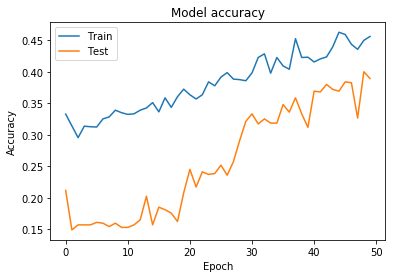

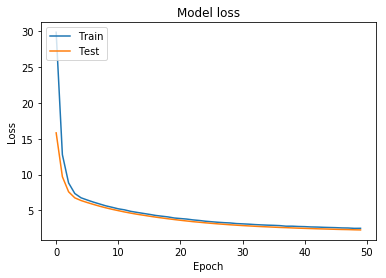

Train on 2250 samples, validate on 750 samples
Epoch 1/50
2250/2250 [==============================] - 1s 275us/step - loss: 2.4758 - acc: 0.4453 - val_loss: 2.2570 - val_acc: 0.4080
Epoch 2/50
2250/2250 [==============================] - 1s 275us/step - loss: 2.4451 - acc: 0.4662 - val_loss: 2.2433 - val_acc: 0.4093
Epoch 3/50
2250/2250 [==============================] - 1s 278us/step - loss: 2.4551 - acc: 0.4733 - val_loss: 2.2239 - val_acc: 0.3587
Epoch 4/50
2250/2250 [==============================] - 1s 268us/step - loss: 2.4258 - acc: 0.4462 - val_loss: 2.2091 - val_acc: 0.3813
Epoch 5/50
2250/2250 [==============================] - 1s 277us/step - loss: 2.3921 - acc: 0.4511 - val_loss: 2.1941 - val_acc: 0.4347
Epoch 6/50
2250/2250 [==============================] - 1s 275us/step - loss: 2.3725 - acc: 0.4791 - val_loss: 2.1804 - val_acc: 0.4253
Epoch 7/50
2250/2250 [==============================] - 1s 275us/step - loss: 2.3522 - acc: 0.4769 - val_loss: 2.1649 - val_acc: 0.3907
E

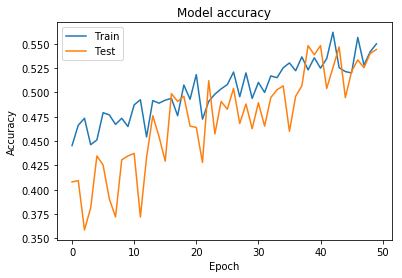

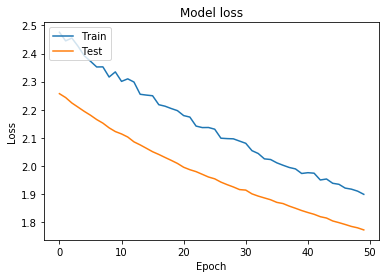

Train on 2250 samples, validate on 750 samples
Epoch 1/50
2250/2250 [==============================] - 1s 278us/step - loss: 1.8838 - acc: 0.5489 - val_loss: 1.7676 - val_acc: 0.5373
Epoch 2/50
2250/2250 [==============================] - 1s 275us/step - loss: 1.8868 - acc: 0.5369 - val_loss: 1.7597 - val_acc: 0.5400
Epoch 3/50
2250/2250 [==============================] - 1s 279us/step - loss: 1.8710 - acc: 0.5556 - val_loss: 1.7570 - val_acc: 0.5867
Epoch 4/50
2250/2250 [==============================] - 1s 275us/step - loss: 1.8656 - acc: 0.5542 - val_loss: 1.7466 - val_acc: 0.5227
Epoch 5/50
2250/2250 [==============================] - 1s 274us/step - loss: 1.8606 - acc: 0.5382 - val_loss: 1.7440 - val_acc: 0.5227
Epoch 6/50
2250/2250 [==============================] - 1s 272us/step - loss: 1.8504 - acc: 0.5591 - val_loss: 1.7357 - val_acc: 0.5333
Epoch 7/50
2250/2250 [==============================] - 1s 275us/step - loss: 1.8385 - acc: 0.5582 - val_loss: 1.7317 - val_acc: 0.5893
E

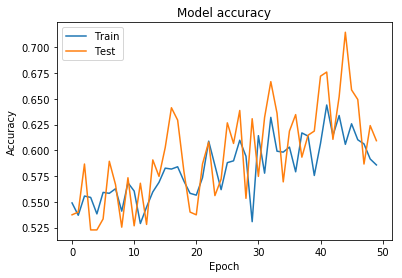

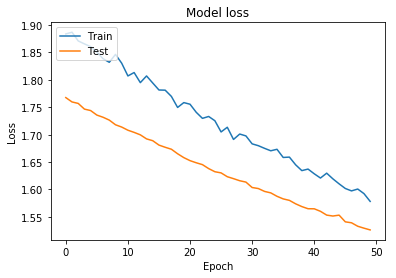

Train on 2250 samples, validate on 750 samples
Epoch 1/50
2250/2250 [==============================] - 1s 285us/step - loss: 1.5740 - acc: 0.6138 - val_loss: 1.5232 - val_acc: 0.6427
Epoch 2/50
2250/2250 [==============================] - 1s 273us/step - loss: 1.5758 - acc: 0.6062 - val_loss: 1.5189 - val_acc: 0.6427
Epoch 3/50
2250/2250 [==============================] - 1s 277us/step - loss: 1.5723 - acc: 0.6253 - val_loss: 1.5148 - val_acc: 0.6413
Epoch 4/50
2250/2250 [==============================] - 1s 273us/step - loss: 1.5541 - acc: 0.6507 - val_loss: 1.5151 - val_acc: 0.6720
Epoch 5/50
2250/2250 [==============================] - 1s 270us/step - loss: 1.5524 - acc: 0.6480 - val_loss: 1.5077 - val_acc: 0.6307
Epoch 6/50
2250/2250 [==============================] - 1s 278us/step - loss: 1.5573 - acc: 0.6142 - val_loss: 1.5042 - val_acc: 0.6627
Epoch 7/50
2250/2250 [==============================] - 1s 275us/step - loss: 1.5530 - acc: 0.6293 - val_loss: 1.5005 - val_acc: 0.6107
E

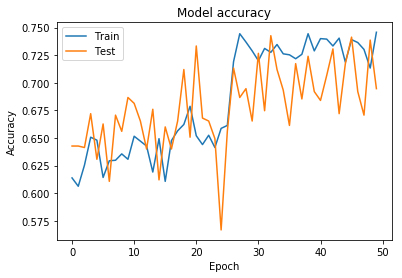

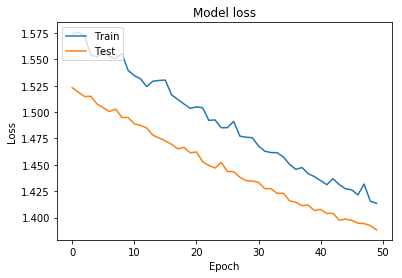

Train on 2250 samples, validate on 750 samples
Epoch 1/50
2250/2250 [==============================] - 1s 286us/step - loss: 1.4116 - acc: 0.7342 - val_loss: 1.3858 - val_acc: 0.6840
Epoch 2/50
2250/2250 [==============================] - 1s 275us/step - loss: 1.4061 - acc: 0.7369 - val_loss: 1.3834 - val_acc: 0.6800
Epoch 3/50
2250/2250 [==============================] - 1s 271us/step - loss: 1.3954 - acc: 0.7422 - val_loss: 1.3864 - val_acc: 0.5827
Epoch 4/50
2250/2250 [==============================] - 1s 273us/step - loss: 1.4142 - acc: 0.7293 - val_loss: 1.3775 - val_acc: 0.6707
Epoch 5/50
2250/2250 [==============================] - 1s 278us/step - loss: 1.3988 - acc: 0.7222 - val_loss: 1.3786 - val_acc: 0.6880
Epoch 6/50
2250/2250 [==============================] - 1s 275us/step - loss: 1.4095 - acc: 0.7253 - val_loss: 1.3753 - val_acc: 0.6853
Epoch 7/50
2250/2250 [==============================] - 1s 271us/step - loss: 1.3951 - acc: 0.7378 - val_loss: 1.3740 - val_acc: 0.6427
E

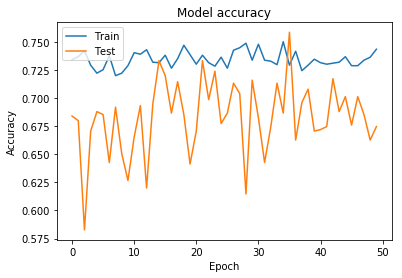

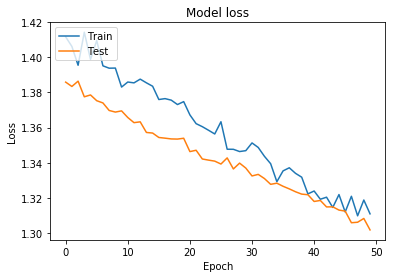

In [18]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', 
                              factor = 0.5,
                              patience = 1, min_lr = 0.0001)
#n_epochs = [100, 80, 60, 40, 20]
class_weights = {0:1.0, 1:5.0}
for i in range(5):    
    history = model.fit(x_train, y_train, 
          validation_split = 0.25, 
          batch_size = 20, 
          epochs = 50,
          verbose = 1,
          callbacks = [reduce_lr],
          class_weight = class_weights)
    stats_avg(history, i = 50)
    plots(history)
    

In [0]:
y_pred = model.predict(x_test)
y_pred = (y_pred >= 0.5)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, y_pred))
conf_matrix

Accuracy: 0.6684420772303595


,Predicted: 0,Predicted: 1
Actual:0,427,209
Actual:1,40,75


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77       636
           1       0.26      0.65      0.38       115

   micro avg       0.67      0.67      0.67       751
   macro avg       0.59      0.66      0.58       751
weighted avg       0.81      0.67      0.71       751

